In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/jlee/amrw/main-amr-wind/tools')

from amrex_particle import AmrexParticleFile
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

os.chdir('/projects/awaken/j3lee/run_amrw/stable/s6_20180612-5m-4towers/')
# os.chdir('/projects/awaken/j3lee/run_amrw/stable/s5_20180612-5m-w-timi/')
# %cd '/projects/awaken/j3lee/run_amrw/stable/s5_20180612-5m-w-timi/post_processing/'

# the first tower is dummy...
tower_num = 4

# adjust time for the time step
dt = 0.2

df_all = pd.DataFrame()

for ind, time in enumerate(range(0, 110000, 3000)):
    
    print(time)

    # Load data from nth timestep in the run directory (containing input file)
    pfile = AmrexParticleFile.load(time, tower_num)

    df = pfile()
    df['t'] = time

    if ind == 0: 
        df_all = df
    else: 
        df_all = df_all.append(df)
        
df_all.reset_index(inplace=True)

# remove erroneous values
df_all[(df_all >= 10e10) | (df_all <= -10e10)] = np.nan

df_all['t'] = df_all['t']*dt

0
3000
6000
9000
12000
15000
18000
21000
24000
27000
30000
33000
36000
39000
42000
45000
48000
51000
54000
57000
60000
63000
66000
69000
72000
75000
78000
81000
84000
87000
90000
93000
96000
99000
102000
105000
108000


In [2]:
df_all

,index,uid,set_id,probe_id,xco,yco,zco,velocityx,velocityy,velocityz,temperature,t
0,0.0,0.0,0.0,3.0,500.0,500.0,15.0,-2.574938,4.784909,0.000000,305.649371,0
1,1.0,1.0,0.0,4.0,500.0,500.0,20.0,-2.401917,4.873829,0.000000,305.665796,0
2,2.0,2.0,0.0,5.0,500.0,500.0,25.0,-2.473752,5.118083,0.000000,305.680101,0
3,3.0,3.0,0.0,6.0,500.0,500.0,30.0,-2.667149,5.440872,0.000000,305.693357,0
4,4.0,4.0,0.0,7.0,500.0,500.0,35.0,-2.858831,5.765377,0.000000,305.706639,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29595,795.0,795.0,3.0,195.0,2800.0,2700.0,975.0,11.538378,8.633273,-0.008743,309.716818,108000
29596,796.0,796.0,3.0,196.0,2800.0,2700.0,980.0,11.599209,8.558875,-0.007305,309.751224,108000
29597,797.0,797.0,3.0,197.0,2800.0,2700.0,985.0,11.659019,8.478233,-0.005609,309.787774,108000
29598,798.0,798.0,3.0,198.0,2800.0,2700.0,990.0,11.719486,8.402782,-0.003761,309.823891,108000


In [6]:
df_all['t'] = df_all['t']*dt

In [4]:
df_all.loc[(df_all['set_id'] == 1)]

,index,uid,set_id,probe_id,xco,yco,zco,velocityx,velocityy,velocityz,temperature,t
198,198.0,198.0,1.0,0.0,2800.0,2800.0,0.0,-3.377128,4.764259,0.000000,305.601382,0
199,199.0,199.0,1.0,1.0,2800.0,2800.0,5.0,-3.132078,4.796161,0.000000,305.614453,0
200,200.0,200.0,1.0,2.0,2800.0,2800.0,10.0,-2.805273,4.838770,0.000000,305.631899,0
201,201.0,201.0,1.0,3.0,2800.0,2800.0,15.0,-2.478340,4.881507,0.000000,305.649371,0
202,202.0,202.0,1.0,4.0,2800.0,2800.0,20.0,-2.274240,5.001505,0.000000,305.665796,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29193,393.0,393.0,1.0,195.0,2800.0,2800.0,975.0,11.544168,8.610444,-0.007907,309.723448,108000
29194,394.0,394.0,1.0,196.0,2800.0,2800.0,980.0,11.601862,8.531055,-0.006536,309.758545,108000
29195,395.0,395.0,1.0,197.0,2800.0,2800.0,985.0,11.653248,8.452693,-0.004945,309.793080,108000
29196,396.0,396.0,1.0,198.0,2800.0,2800.0,990.0,11.710884,8.380269,-0.003336,309.827333,108000


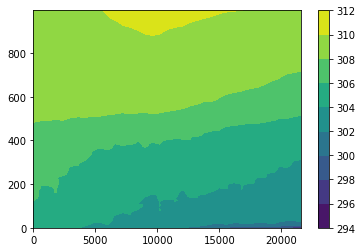

In [2]:
df_1 = df_all.loc[(df_all['set_id'] == 1)]
df = df_1.pivot('zco', 't', 'temperature')
X = df.columns.values
Y = df.index.values
Z = df.values
x, y =np.meshgrid(X, Y)
cs = plt.contourf(x, y, Z)
cbar = plt.colorbar(cs)

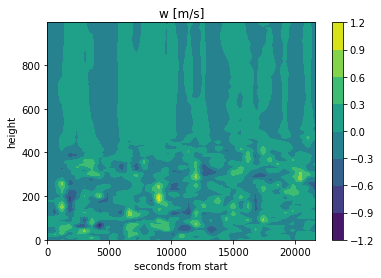

In [3]:
df_1 = df_all.loc[(df_all['set_id'] == 1)]
df = df_1.pivot('zco', 't', 'velocityz')
X = df.columns.values
Y = df.index.values
Z = df.values
x, y =np.meshgrid(X, Y)
cs = plt.contourf(x, y, Z)
cbar = plt.colorbar(cs)
plt.ylabel('height')
plt.xlabel('seconds from start')
plt.title('w [m/s]')
plt.show()

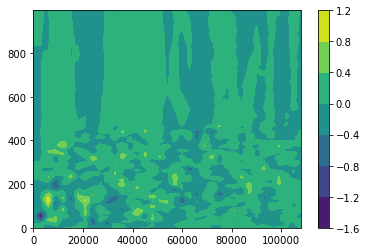

In [169]:
df_1 = df_all.loc[(df_all['set_id'] == 2)]
df = df_1.pivot('zco', 't', 'velocityz')
X = df.columns.values
Y = df.index.values
Z = df.values
x, y =np.meshgrid(X, Y)
cs = plt.contourf(x, y, Z)
cbar = plt.colorbar(cs)

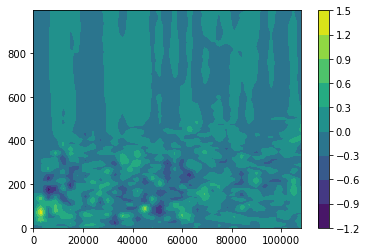

In [170]:
df_1 = df_all.loc[(df_all['set_id'] == 3)]
df = df_1.pivot('zco', 't', 'velocityz')
X = df.columns.values
Y = df.index.values
Z = df.values
x, y =np.meshgrid(X, Y)
cs = plt.contourf(x, y, Z)
cbar = plt.colorbar(cs)

TypeError: Input z must be 2D, not 1D

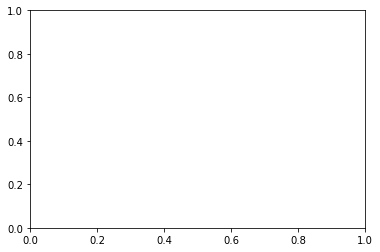

In [155]:
df_1 = df_all.loc[(df_all['set_id'] == 1)]

x = df_1['zco'].values
y = df_1['t'].values
z = df_1['velocityx'].values
x,y = np.meshgrid(x, y)
plt.contourf(x, y, z)

In [110]:
np.arange(0, 110000, 27000)

array([     0,  27000,  54000,  81000, 108000])

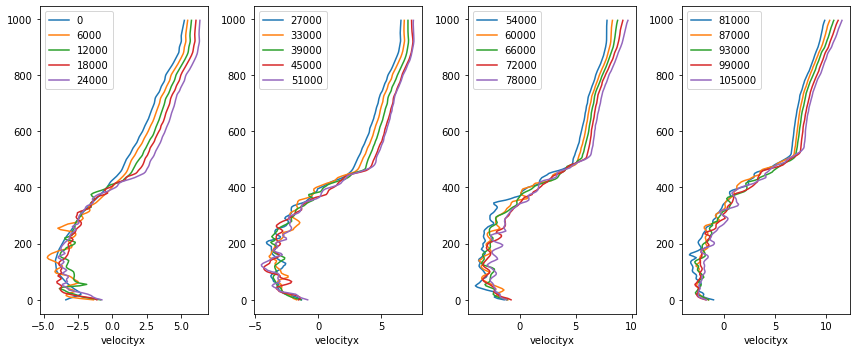

In [3]:
fig, ax = plt.subplots(1, 4, figsize=(12, 5))

for ind, time in enumerate(range(0, 27000, 6000)):
    df_all.loc[(df_all['set_id'] == 1) & (df_all['t'] == time)].plot('velocityx', 'zco', label=str(time), ax=ax[0])

for ind, time in enumerate(range(27000, 54000, 6000)):
    df_all.loc[(df_all['set_id'] == 1) & (df_all['t'] == time)].plot('velocityx', 'zco', label=str(time), ax=ax[1])
    
for ind, time in enumerate(range(54000, 81000, 6000)):
    df_all.loc[(df_all['set_id'] == 1) & (df_all['t'] == time)].plot('velocityx', 'zco', label=str(time), ax=ax[2])

for ind, time in enumerate(range(81000, 108000, 6000)):
    df_all.loc[(df_all['set_id'] == 1) & (df_all['t'] == time)].plot('velocityx', 'zco', label=str(time), ax=ax[3])

plt.tight_layout()
plt.show()

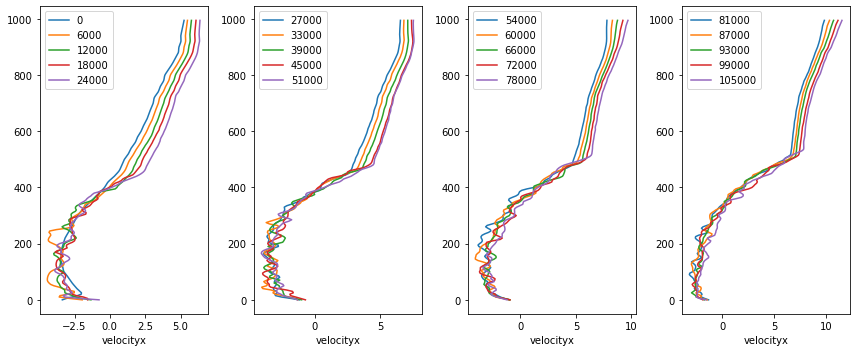

In [154]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 4, figsize=(12, 5))

for ind, time in enumerate(range(0, 27000, 6000)):
    df_all.loc[(df_all['set_id'] == 2) & (df_all['t'] == time)].plot('velocityx', 'zco', label=str(time), ax=ax[0])

for ind, time in enumerate(range(27000, 54000, 6000)):
    df_all.loc[(df_all['set_id'] == 2) & (df_all['t'] == time)].plot('velocityx', 'zco', label=str(time), ax=ax[1])
    
for ind, time in enumerate(range(54000, 81000, 6000)):
    df_all.loc[(df_all['set_id'] == 2) & (df_all['t'] == time)].plot('velocityx', 'zco', label=str(time), ax=ax[2])

for ind, time in enumerate(range(81000, 108000, 6000)):
    df_all.loc[(df_all['set_id'] == 2) & (df_all['t'] == time)].plot('velocityx', 'zco', label=str(time), ax=ax[3])

plt.tight_layout()
plt.show()

In [ ]:
df_all.loc

In [53]:
# Load data from 1000th timestep in  the run directory (containing input file)
pfile = AmrexParticleFile.load(3000, tower_num)

# get dataframe
df2 = pfile()

In [55]:
df2['t'] = 3000

In [57]:
df['t'] = 0
df

,uid,set_id,probe_id,xco,yco,zco,velocityx,velocityy,velocityz,temperature,t
0,0,0,3,500.0,500.0,15.0,-2.574938,4.784909,0.0,305.649371,0
1,1,0,4,500.0,500.0,20.0,-2.401917,4.873829,0.0,305.665796,0
2,2,0,5,500.0,500.0,25.0,-2.473752,5.118083,0.0,305.680101,0
3,3,0,6,500.0,500.0,30.0,-2.667149,5.440872,0.0,305.693357,0
4,4,0,7,500.0,500.0,35.0,-2.858831,5.765377,0.0,305.706639,0
...,...,...,...,...,...,...,...,...,...,...,...
795,795,3,195,2800.0,2700.0,975.0,5.161101,11.825985,0.0,309.679895,0
796,796,3,196,2800.0,2700.0,980.0,5.182591,11.784797,0.0,309.691959,0
797,797,3,197,2800.0,2700.0,985.0,5.203679,11.746308,0.0,309.707495,0
798,798,3,198,2800.0,2700.0,990.0,5.224566,11.709167,0.0,309.724781,0


In [56]:
df2

,uid,set_id,probe_id,xco,yco,zco,velocityx,velocityy,velocityz,temperature,t
0,0,0,3,500.0,500.0,15.0,-2.778885,4.507191,-0.002908,305.292836,3000
1,1,0,4,500.0,500.0,20.0,-2.858625,4.767700,0.151642,305.326689,3000
2,2,0,5,500.0,500.0,25.0,-2.749423,5.248699,0.302223,305.351675,3000
3,3,0,6,500.0,500.0,30.0,-3.050463,6.040954,0.460761,305.397764,3000
4,4,0,7,500.0,500.0,35.0,-3.435460,6.833135,0.614429,305.467128,3000
...,...,...,...,...,...,...,...,...,...,...,...
795,795,3,195,2800.0,2700.0,975.0,5.318686,11.791278,-0.000077,309.698433,3000
796,796,3,196,2800.0,2700.0,980.0,5.338206,11.747402,-0.000061,309.708854,3000
797,797,3,197,2800.0,2700.0,985.0,5.357569,11.705126,-0.000046,309.720686,3000
798,798,3,198,2800.0,2700.0,990.0,5.376181,11.665221,-0.000030,309.733221,3000


In [59]:
df.append(df2).reset_index()

,index,uid,set_id,probe_id,xco,yco,zco,velocityx,velocityy,velocityz,temperature,t
0,0,0,0,3,500.0,500.0,15.0,-2.574938,4.784909,0.000000,305.649371,0
1,1,1,0,4,500.0,500.0,20.0,-2.401917,4.873829,0.000000,305.665796,0
2,2,2,0,5,500.0,500.0,25.0,-2.473752,5.118083,0.000000,305.680101,0
3,3,3,0,6,500.0,500.0,30.0,-2.667149,5.440872,0.000000,305.693357,0
4,4,4,0,7,500.0,500.0,35.0,-2.858831,5.765377,0.000000,305.706639,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,795,795,3,195,2800.0,2700.0,975.0,5.318686,11.791278,-0.000077,309.698433,3000
1596,796,796,3,196,2800.0,2700.0,980.0,5.338206,11.747402,-0.000061,309.708854,3000
1597,797,797,3,197,2800.0,2700.0,985.0,5.357569,11.705126,-0.000046,309.720686,3000
1598,798,798,3,198,2800.0,2700.0,990.0,5.376181,11.665221,-0.000030,309.733221,3000


In [62]:
df

,uid,set_id,probe_id,xco,yco,zco,velocityx,velocityy,velocityz,temperature,t
0,0,0,3,500.0,500.0,15.0,-3.102489,5.035386,0.095611,305.043380,9000
1,1,0,4,500.0,500.0,20.0,-3.661579,4.953033,-0.189796,305.055341,9000
2,2,0,5,500.0,500.0,25.0,-3.659333,5.607985,-0.243822,305.128362,9000
3,3,0,6,500.0,500.0,30.0,-3.673800,6.695874,-0.173992,305.205040,9000
4,4,0,7,500.0,500.0,35.0,-3.666149,7.425503,-0.156535,305.277169,9000
...,...,...,...,...,...,...,...,...,...,...,...
795,795,3,195,2800.0,2700.0,975.0,5.577231,12.042859,0.001094,309.789766,9000
796,796,3,196,2800.0,2700.0,980.0,5.589780,12.027011,0.000874,309.801521,9000
797,797,3,197,2800.0,2700.0,985.0,5.602204,12.013743,0.000654,309.814723,9000
798,798,3,198,2800.0,2700.0,990.0,5.613977,12.003957,0.000435,309.828686,9000


In [20]:
print("\n".join(["%#05d" % num for num in range(0, 10)]))

00000
00001
00002
00003
00004
00005
00006
00007
00008
00009


In [27]:
for num in range(0, 10):
    s = "%#05d" % num

In [44]:
int('%09.0f' % 300)

300

In [35]:
x = int(3000)    
NewStringVariable = str(x).zfill(5)    
print(NewStringVariable)

03000


In [32]:
NewStringVariable

'001'

In [49]:
for i in range(0, 10000, 3000):
    print(i)

0
3000
6000
9000


In [16]:
int(s)

9000

In [47]:
df

,uid,set_id,probe_id,xco,yco,zco,velocityx,velocityy,velocityz,temperature
0,0,0,3,500.0,500.0,15.0,-2.574938,4.784909,0.0,305.649371
1,1,0,4,500.0,500.0,20.0,-2.401917,4.873829,0.0,305.665796
2,2,0,5,500.0,500.0,25.0,-2.473752,5.118083,0.0,305.680101
3,3,0,6,500.0,500.0,30.0,-2.667149,5.440872,0.0,305.693357
4,4,0,7,500.0,500.0,35.0,-2.858831,5.765377,0.0,305.706639
...,...,...,...,...,...,...,...,...,...,...
795,795,3,195,2800.0,2700.0,975.0,5.161101,11.825985,0.0,309.679895
796,796,3,196,2800.0,2700.0,980.0,5.182591,11.784797,0.0,309.691959
797,797,3,197,2800.0,2700.0,985.0,5.203679,11.746308,0.0,309.707495
798,798,3,198,2800.0,2700.0,990.0,5.224566,11.709167,0.0,309.724781


In [27]:
range(0, 5 * 24, 5)

range(0, 120, 5)

In [48]:
df['probe_id'].values

array([                  3,                   4,                   5,
                         6,                   7,                   8,
                         9,                  10,                  11,
                        12,                  13,                  14,
                        15,                  16,                  17,
                        18,                  19,                  20,
                        21,                  22,                  23,
                        24,                  25,                  26,
                        27,                  28,                  29,
                        30,                  31,                  32,
                        33,                  34,                  35,
                        36,                  37,                  38,
                        39,                  40,                  41,
                        42,                  43,                  44,
                    

In [8]:
df['uid'].values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [14]:
# Load data from 1000th timestep in  the run directory (containing input file)
pfile = AmrexParticleFile.load(87000)

# get dataframe
df = pfile()

df

,uid,set_id,probe_id,xco,yco,zco,velocityx,velocityy,velocityz,temperature
0,0,0,1,500.0,500.0,5.025126,-1.584048,1.599572,-0.081271,299.767597
1,1,0,2,500.0,500.0,10.050251,-1.903741,2.316022,-0.117982,301.041183
2,2,0,3,500.0,500.0,15.075377,-2.174807,2.631630,-0.138234,301.532168
3,3,0,4,500.0,500.0,20.100503,-2.362597,2.918405,-0.153701,301.809806
4,4,0,5,500.0,500.0,25.125628,-2.388804,3.169368,-0.137859,301.977325
...,...,...,...,...,...,...,...,...,...,...
393,393,1,194,2800.0,2800.0,974.874372,10.142953,9.869935,-0.000022,309.883855
394,394,1,195,2800.0,2800.0,979.899497,10.190704,9.832477,0.000045,309.907483
395,395,1,196,2800.0,2800.0,984.924623,10.246174,9.784074,0.000215,309.935031
396,396,1,197,2800.0,2800.0,989.949749,10.301505,9.730782,0.000326,309.963478


In [30]:
df.columns

Index(['uid', 'set_id', 'probe_id', 'xco', 'yco', 'zco', 'velocityx',
       'velocityy', 'velocityz', 'temperature'],
      dtype='object')

In [3]:
df['set_id'].values

array([                  0,                   0,                   0,
                         0,                   0,                   0,
                         0,                   0,                   0,
                         0,                   0,                   0,
                         0,                   0,                   0,
                         0,                   0,                   0,
                         0,                   0,                   0,
                         0,                   0,                   0,
                         0,                   0,                   0,
                         0,                   0,                   0,
                         0,                   0,                   0,
                         0,                   0,                   0,
                         0,                   0,                   0,
                         0,                   0,                   0,
                    

In [32]:
df['velocityx'].values

array([-1.53087337e+000, -1.82480151e+000, -2.02516135e+000,
       -2.17093690e+000, -2.21653531e+000, -2.16982554e+000,
       -2.27135324e+000, -2.78342679e+000, -3.11870483e+000,
       -3.03123266e+000, -3.12552983e+000, -3.26256233e+000,
       -2.93748162e+000, -2.43284204e+000, -2.42615362e+000,
       -2.70259692e+000, -2.86215234e+000, -3.00423475e+000,
       -3.00692340e+000, -2.94102706e+000, -2.95731648e+000,
       -2.98666245e+000, -2.98311026e+000, -2.98240519e+000,
       -2.97105274e+000, -2.83954061e+000, -2.62593424e+000,
       -2.55295908e+000, -2.58697931e+000, -2.59952522e+000,
       -2.59496973e+000, -2.64136732e+000, -2.68841522e+000,
       -2.79677559e+000, -2.85493660e+000, -2.60997114e+000,
       -2.37140260e+000, -2.25116432e+000, -2.13806521e+000,
       -2.12526740e+000, -2.28368325e+000, -2.35005881e+000,
       -2.15948100e+000, -1.98997728e+000, -2.00759572e+000,
       -1.95867397e+000, -2.05259408e+000, -2.04130322e+000,
       -1.79392841e+000,

In [33]:
df['probe_id'].values

array([              1,               2,               3,               4,
                     5,               6,               7,               8,
                     9,              10,              11,              12,
                    13,              14,              15,              16,
                    17,              18,              19,              20,
                    21,              22,              23,              24,
                    25,              26,              27,              28,
                    29,              30,              31,              32,
                    33,              34,              35,              36,
                    37,              38,              39,              40,
                    41,              42,              43,              44,
                    45,              46,              47,              48,
                    49,              50,              51,              52,
                    53,  

In [6]:
import os
os.chdir('/projects/awaken/j3lee/run_amrw/stable/s5_20180612-5m-w-timi/post_processing')

In [16]:
os.getcwd()

'/lustre/eaglefs/projects/awaken/j3lee/run_amrw/stable/s5_20180612-5m-w-timi/post_processing'

In [17]:
%cd '/projects/awaken/j3lee/run_amrw/stable/s5_20180612-5m-w-timi/post_processing/'

/lustre/eaglefs/projects/awaken/j3lee/awaken-code/eagle


In [18]:
os.getcwd()

'/lustre/eaglefs/projects/awaken/j3lee/run_amrw/stable/s5_20180612-5m-w-timi/post_processing'